In [1]:
# importamos los datasets y algunas funciones útiles de scikit-learn
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection

# importamos TensorFlow
import tensorflow as tf

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# bajamos el nivel de verbosidad de los logs para evitar ver excesivas trazas
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
# cargamos el dataset de flores iris (Ronald Fisher - 1936)
iris = datasets.load_iris()

data = iris.data
data[:10]
# Largo de sépalo, Ancho de sépalo, Largo de pétalo, Ancho de pétalo

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [4]:
target = iris.target
target
# setosa, versicolor, virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# partimos el dataset en dos conjuntos, el de entrenamiento y el de validación
x_train, x_test, y_train, y_test = model_selection.train_test_split(data,
                                                                    target,
                                                                    test_size=0.2,
                                                                    random_state=42)

In [6]:
# definimos una red neuronal profunda de 3 capas con 10, 20 y 10 unidades respectivamente
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=3)

In [7]:
# entrenamos la red neuronal con los datos de entrenamiento
classifier.fit(x_train, y_train, steps=200)

# usamos el modelo entrenado para realizar predicciones con los datos de validación
predictions = list(classifier.predict(x_test, as_iterable=True))

# comprobamos como de buenas han sido las predicciones y calculamos la precisión de nuestro modelo
score = metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:f}'.format(score))

/usr/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Accuracy: 1.000000


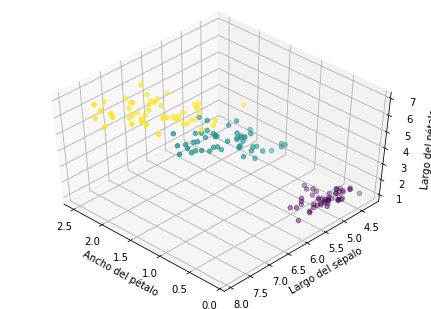

In [10]:
real_fig = plt.figure()

ax = Axes3D(real_fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data[:, 3], data[:, 0], data[:, 2], c=target)

ax.set_xlabel('Ancho del pétalo')
ax.set_ylabel('Largo del sépalo')
ax.set_zlabel('Largo del pétalo')

plt.show()

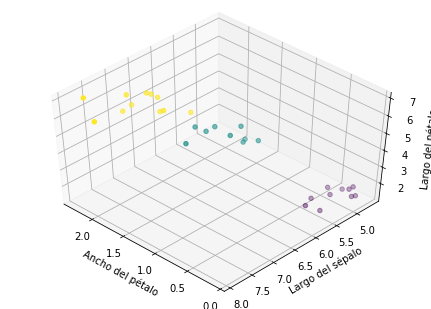

In [15]:
estimated_fig = plt.figure()

ax = Axes3D(estimated_fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(x_test[:, 3], x_test[:, 0], x_test[:, 2], c=y_test)

ax.set_xlabel('Ancho del pétalo')
ax.set_ylabel('Largo del sépalo')
ax.set_zlabel('Largo del pétalo')

plt.show()